In [47]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
from census import Census
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from requests.structures import CaseInsensitiveDict
import datetime
from scipy import stats
import seaborn as sns
%matplotlib inline
import hvplot.pandas
import seaborn as sns
import re

In [12]:
load_arsenic = Path("Resources/arsenic_county_year.csv")
poverty_path = Path("Resources/county_poverty_rates.csv")
water_arsenic = Path("Resources/water_arsenic.csv")

poverty_df = pd.read_csv(poverty_path)
arsenic_df = pd.read_csv(load_arsenic)
water_arsenic_df = pd.read_csv(water_arsenic)
water_arsenic_df

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,1998,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.35 ug/L,3.6 ug/L,1984,27001
1,1010002,1998,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45,27001
2,1010019,1998,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,NaN,NaN,25,27001
3,1010011,1998,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.4 ug/L,4.4 ug/L,633,27001
4,1010016,1998,Arsenic,McGregor,Aitkin,McGregor,Groundwater,NaN,NaN,394,27001
...,...,...,...,...,...,...,...,...,...,...,...
23004,1870005,2022,Arsenic,Hanley Falls,Yellow Medicine,Hanley Falls,Groundwater,4.06 ug/L,4.06 ug/L,275,27173
23005,1870011,2022,Arsenic,Hazel Run,Yellow Medicine,Hazel Run,Purchased Groundwater,0.99 ug/L,1.8 ug/L,61,27173
23006,1870006,2022,Arsenic,Porter,Yellow Medicine,Porter,Purchased Groundwater,0.99 ug/L,1.8 ug/L,180,27173
23007,1870007,2022,Arsenic,Saint Leo,Yellow Medicine,St. Leo,Purchased Groundwater,0.99 ug/L,1.8 ug/L,97,27173


In [13]:
city_count_per_county = water_arsenic_df.groupby('countyServed')['cityServed'].nunique()
city_count_per_county

countyServed
Aitkin              4
Anoka              21
Becker              5
Beltrami            4
Benton              3
                   ..
Watonwan            8
Wilkin              5
Winona              9
Wright             14
Yellow Medicine     9
Name: cityServed, Length: 87, dtype: int64

In [14]:
# Calculate the total number of unique schools
county_count = len(arsenic_df["countyServed"].unique())
county_count

87

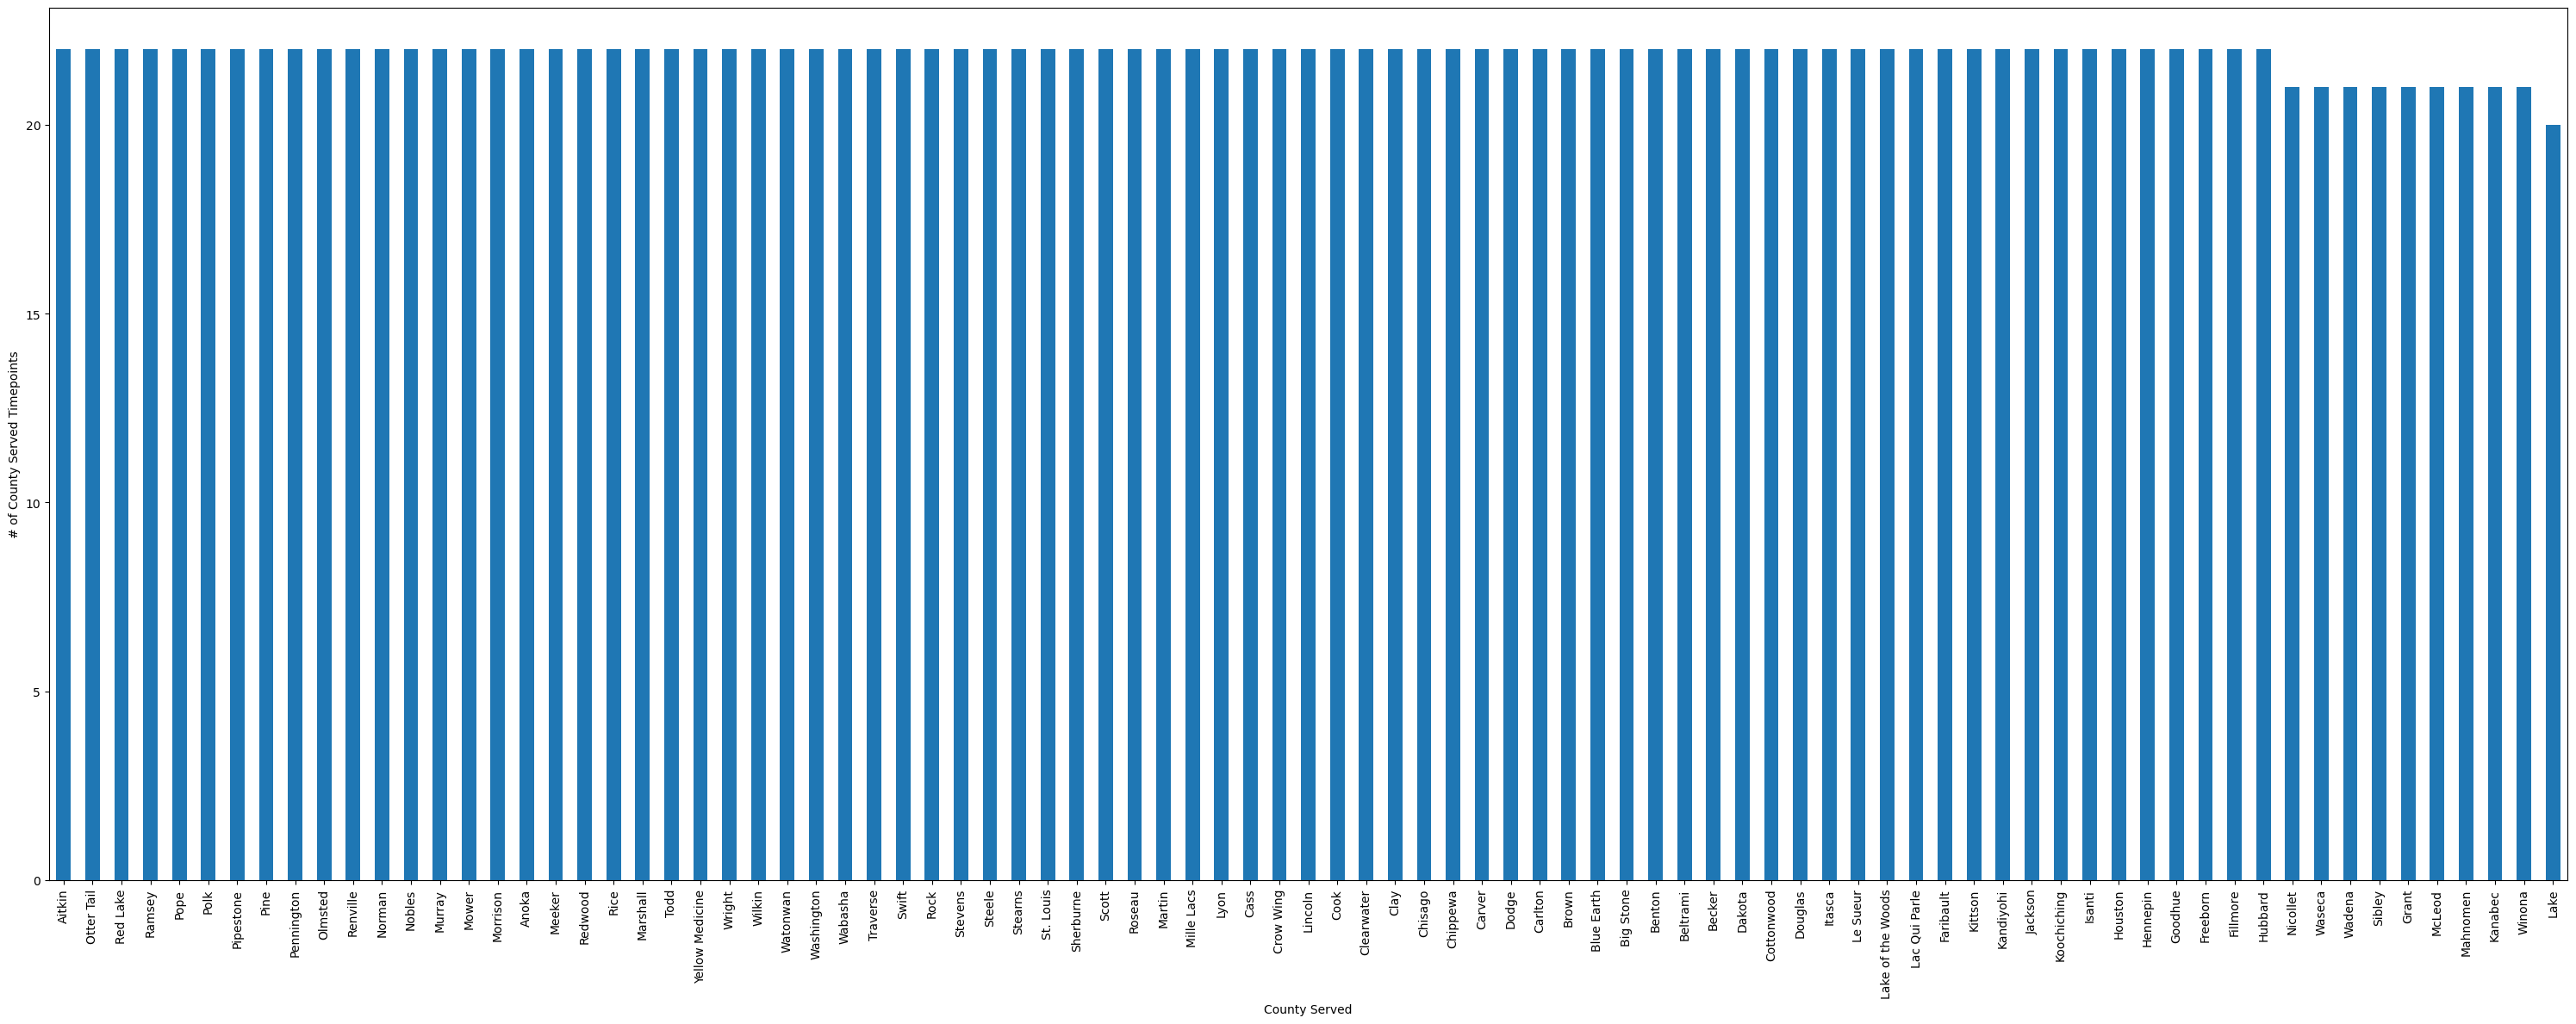

In [15]:
plt.figure(figsize=(30, 12))

observed_county = arsenic_df["countyServed"].value_counts()
observed_county.plot.bar(color='tab:blue') 
plt.xlabel("County Served")
plt.ylabel("# of County Served Timepoints")

plt.tight_layout()

plt.show()

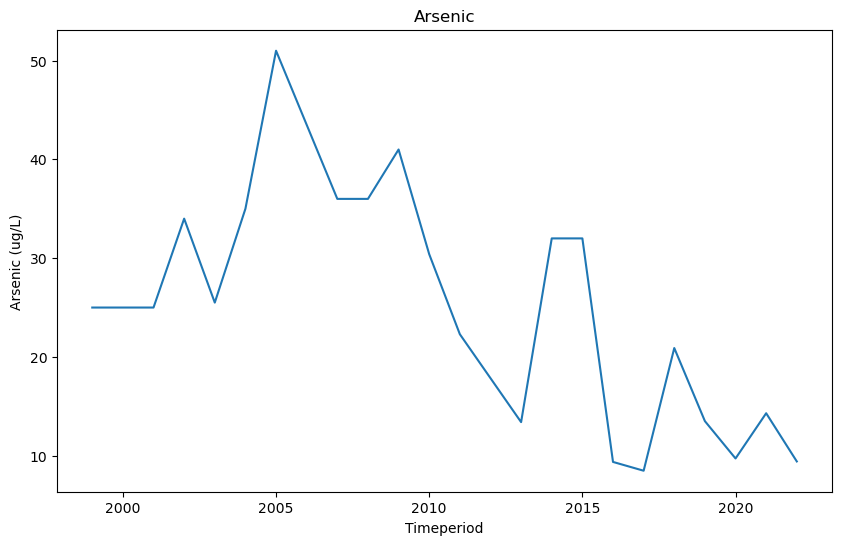

In [16]:
county_id = 'Grant'
data = arsenic_df[arsenic_df["countyServed"] == county_id]
plt.figure(figsize=(10, 6))
plt.plot(data["year"], data["max arsenic (ug/L)"])
plt.xlabel("Timeperiod")
plt.ylabel("Arsenic (ug/L)")
plt.title("Arsenic")
plt.show()

In [17]:
water_arsenic_df

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
0,1010001,1998,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.35 ug/L,3.6 ug/L,1984,27001
1,1010002,1998,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45,27001
2,1010019,1998,Arsenic,Why-Not Park,Aitkin,Aitkin,Groundwater,NaN,NaN,25,27001
3,1010011,1998,Arsenic,Hill City,Aitkin,Hill City,Groundwater,4.4 ug/L,4.4 ug/L,633,27001
4,1010016,1998,Arsenic,McGregor,Aitkin,McGregor,Groundwater,NaN,NaN,394,27001
...,...,...,...,...,...,...,...,...,...,...,...
23004,1870005,2022,Arsenic,Hanley Falls,Yellow Medicine,Hanley Falls,Groundwater,4.06 ug/L,4.06 ug/L,275,27173
23005,1870011,2022,Arsenic,Hazel Run,Yellow Medicine,Hazel Run,Purchased Groundwater,0.99 ug/L,1.8 ug/L,61,27173
23006,1870006,2022,Arsenic,Porter,Yellow Medicine,Porter,Purchased Groundwater,0.99 ug/L,1.8 ug/L,180,27173
23007,1870007,2022,Arsenic,Saint Leo,Yellow Medicine,St. Leo,Purchased Groundwater,0.99 ug/L,1.8 ug/L,97,27173


In [40]:
years_df = water_arsenic_df[(water_arsenic_df['year'] >= 2010) & (water_arsenic_df['year'] <= 2022)]
years_df_cleaned = years_df.dropna(subset=['mean'])
years_df_cleaned 

,pwsId,year,analyteCode,pwsName,countyServed,cityServed,waterSource,mean,max,populationServed,fips
11496,1010001,2010,Arsenic,Aitkin,Aitkin,Aitkin,Groundwater,3.09 ug/L,3.22 ug/L,1984,27001
11497,1010002,2010,Arsenic,Thompson Mobile Home Park,Aitkin,Aitkin,Groundwater,0.5 ug/L (ND),0.5 ug/L (ND),45,27001
11499,1010011,2010,Arsenic,Hill City,Aitkin,Hill City,Groundwater,5.82 ug/L,5.82 ug/L,633,27001
11500,1010016,2010,Arsenic,McGregor,Aitkin,McGregor,Groundwater,4.83 ug/L,4.83 ug/L,394,27001
11501,1010013,2010,Arsenic,Palisade,Aitkin,Palisade,Groundwater,2.01 ug/L,2.01 ug/L,167,27001
...,...,...,...,...,...,...,...,...,...,...,...
23004,1870005,2022,Arsenic,Hanley Falls,Yellow Medicine,Hanley Falls,Groundwater,4.06 ug/L,4.06 ug/L,275,27173
23005,1870011,2022,Arsenic,Hazel Run,Yellow Medicine,Hazel Run,Purchased Groundwater,0.99 ug/L,1.8 ug/L,61,27173
23006,1870006,2022,Arsenic,Porter,Yellow Medicine,Porter,Purchased Groundwater,0.99 ug/L,1.8 ug/L,180,27173
23007,1870007,2022,Arsenic,Saint Leo,Yellow Medicine,St. Leo,Purchased Groundwater,0.99 ug/L,1.8 ug/L,97,27173


In [43]:

# Define a function to extract numeric values from a string
def extract_numeric(s):
    # Use regular expression to find all numeric values in the string
    numeric_values = re.findall(r'\d+\.\d+', str(s))
    
    # Convert the list of numeric values to float and return the mean
    return float(numeric_values[0]) if numeric_values else None

# Apply the function to the 'mean' column to extract numeric values
years_df_cleaned['mean'] = years_df_cleaned['mean'].apply(extract_numeric)

# Group by 'year' and 'countyServed', then calculate the mean for each group
average_mean_by_count_and_year = years_df_cleaned.groupby(['year', 'countyServed'])['mean'].mean().reset_index()

# Display the result
average_mean_by_count_and_year



C:\Users\woini\AppData\Local\Temp\ipykernel_4244\3845600829.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  years_df_cleaned['mean'] = years_df_cleaned['mean'].apply(extract_numeric)


,year,countyServed,mean
0,2010,Aitkin,3.250000
1,2010,Anoka,1.909032
2,2010,Becker,4.273333
3,2010,Beltrami,1.744375
4,2010,Benton,0.995000
...,...,...,...
1037,2022,Watonwan,1.555000
1038,2022,Wilkin,1.306000
1039,2022,Winona,0.710833
1040,2022,Wright,1.642778


In [44]:
# Group by 'countyServed' and calculate the mean for each group
average_mean_by_county = average_mean_by_count_and_year.groupby('countyServed')['mean'].mean().reset_index()

# Display the result
average_mean_by_county


,countyServed,mean
0,Aitkin,3.347292
1,Anoka,1.610718
2,Becker,2.984398
3,Beltrami,1.930845
4,Benton,1.114933
...,...,...
82,Watonwan,1.300625
83,Wilkin,1.440250
84,Winona,0.581622
85,Wright,1.595648


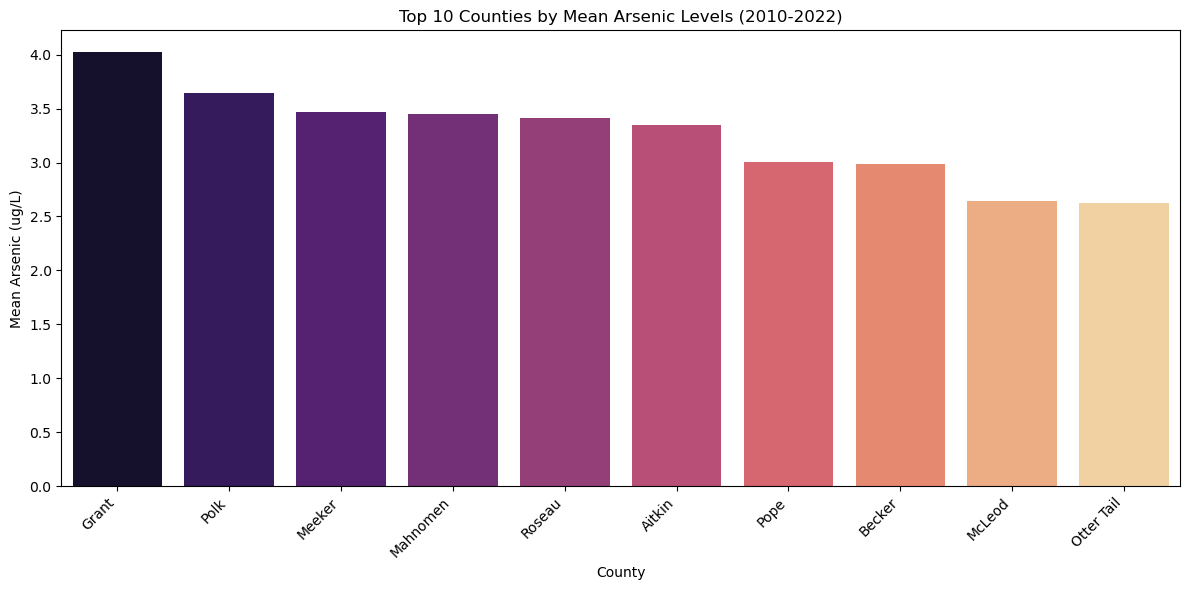

In [45]:
top_counties = average_mean_by_county.nlargest(10, 'mean')

plt.figure(figsize=(12, 6))
sns.barplot(x='countyServed', y='mean', data=top_counties, palette='magma')
plt.xlabel('County')
plt.ylabel('Mean Arsenic (ug/L)')
plt.title('Top 10 Counties by Mean Arsenic Levels (2010-2022)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [46]:
sorted_df = average_mean_by_county.sort_values(by='mean', ascending=False)
top_5_counties = sorted_df.head(5)
top_5_counties

,countyServed,mean
25,Grant,4.024385
59,Polk,3.643977
46,Meeker,3.466970
42,Mahnomen,3.445278
67,Roseau,3.416667


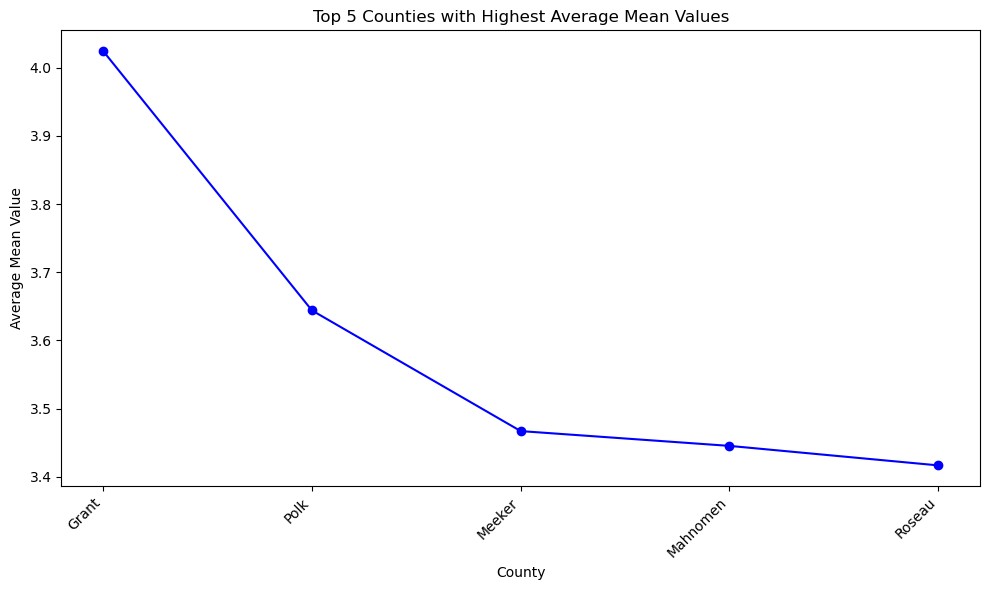

In [48]:
counties = top_5_counties['countyServed']
mean_values = top_5_counties['mean']

# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(counties, mean_values, marker='o', linestyle='-', color='b')
plt.title('Top 5 Counties with Highest Average Mean Values')
plt.xlabel('County')
plt.ylabel('Average Mean Value')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()

# Show the plot
plt.show()


In [49]:
sorted_df = top_5_counties.sort_values(by='mean', ascending=True)
lowest_5_counties = sorted_df.head(5)
lowest_5_counties

,countyServed,mean
67,Roseau,3.416667
42,Mahnomen,3.445278
46,Meeker,3.466970
59,Polk,3.643977
25,Grant,4.024385


In [50]:
max_years_df = arsenic_df.loc[arsenic_df.groupby('countyServed')['max arsenic (ug/L)'].idxmax()]
max_years_df = df_filtered.drop('Unnamed: 0', axis=1, errors='ignore')
max_years_df.head()

,year,countyServed,max arsenic (ug/L)
861,2010,Aitkin,5.82
862,2010,Anoka,12.60
863,2010,Becker,15.70
864,2010,Beltrami,5.56
865,2010,Benton,2.61


In [51]:
threshold = 10

# Filter the DataFrame to include only rows where 'value' is about 10
about_10_df = max_years_df[max_years_df['max arsenic (ug/L)'].between(threshold - 1, threshold + 1)]
about_10_df

,year,countyServed,max arsenic (ug/L)
884,2010,Freeborn,9.28
894,2010,Kandiyohi,9.09
928,2010,Roseau,10.30
981,2011,Kandiyohi,9.09
983,2011,Koochiching,10.90
1008,2011,Pope,9.89
1036,2013,Anoka,9.70
1061,2013,Hennepin,9.00
1066,2013,Jackson,9.30
1068,2013,Kandiyohi,9.09


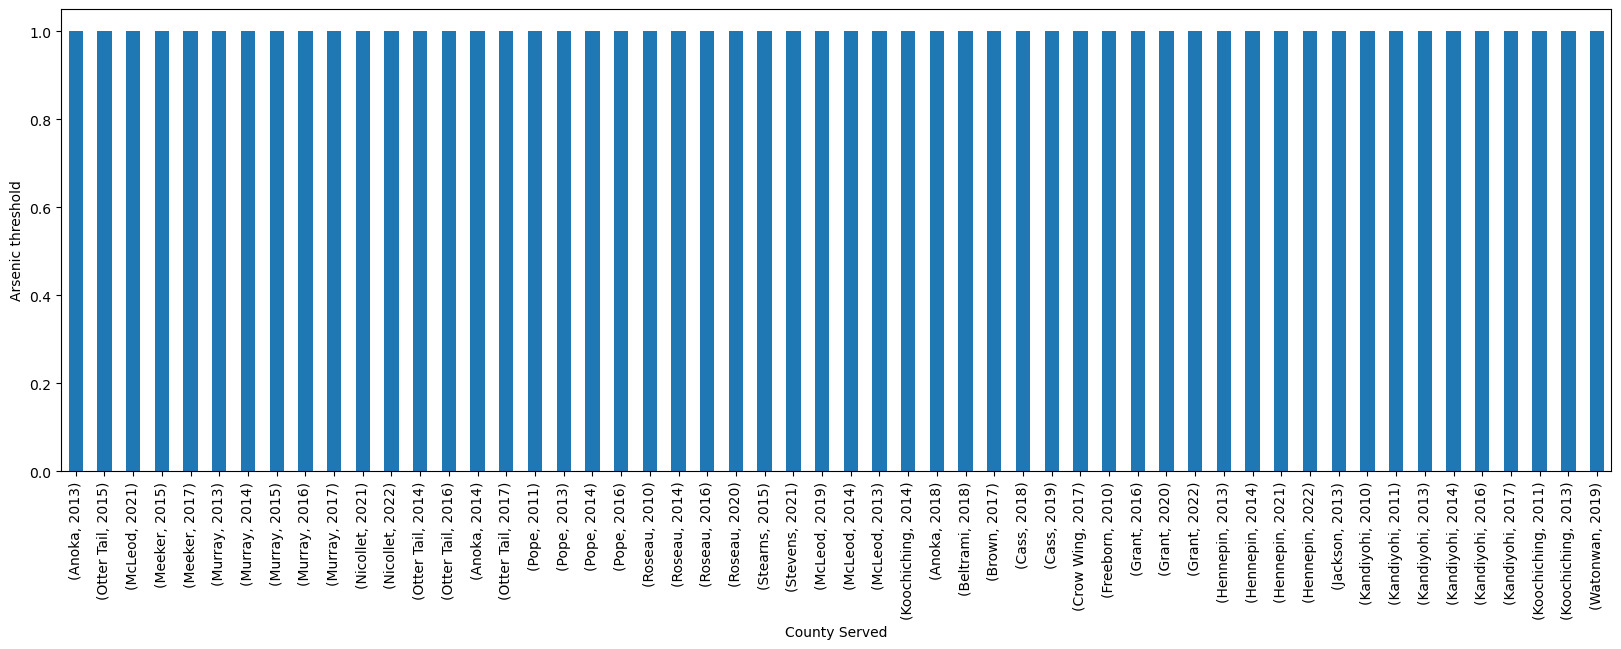

In [52]:
plt.figure(figsize=(20, 6))

max_county = about_10_df[["countyServed", "year"]].value_counts()
max_county.plot.bar(color='tab:blue') 
plt.xlabel("County Served")
plt.ylabel("Arsenic threshold")

plt.show()


In [53]:
arsenic_df
df_filtered = arsenic_df[(arsenic_df['year'] >= 2010) & (arsenic_df['year'] <= 2022)]
df_filtered = df_filtered.drop('Unnamed: 0', axis=1, errors='ignore')
df_filtered

,year,countyServed,max arsenic (ug/L)
861,2010,Aitkin,5.82
862,2010,Anoka,12.60
863,2010,Becker,15.70
864,2010,Beltrami,5.56
865,2010,Benton,2.61
...,...,...,...
1898,2022,Watonwan,8.94
1899,2022,Wilkin,3.97
1900,2022,Winona,3.03
1901,2022,Wright,7.53


In [54]:
df_avg_arsenic_by_county = df_filtered.groupby('countyServed')['max arsenic (ug/L)'].mean()
df_avg_arsenic_by_county = df_avg_arsenic_by_county.reset_index()
df_avg_arsenic_by_county

,countyServed,max arsenic (ug/L)
0,Aitkin,5.979167
1,Anoka,8.749167
2,Becker,11.467500
3,Beltrami,5.821667
4,Benton,2.582500
...,...,...
82,Watonwan,7.321667
83,Wilkin,3.439167
84,Winona,1.629167
85,Wright,7.434167


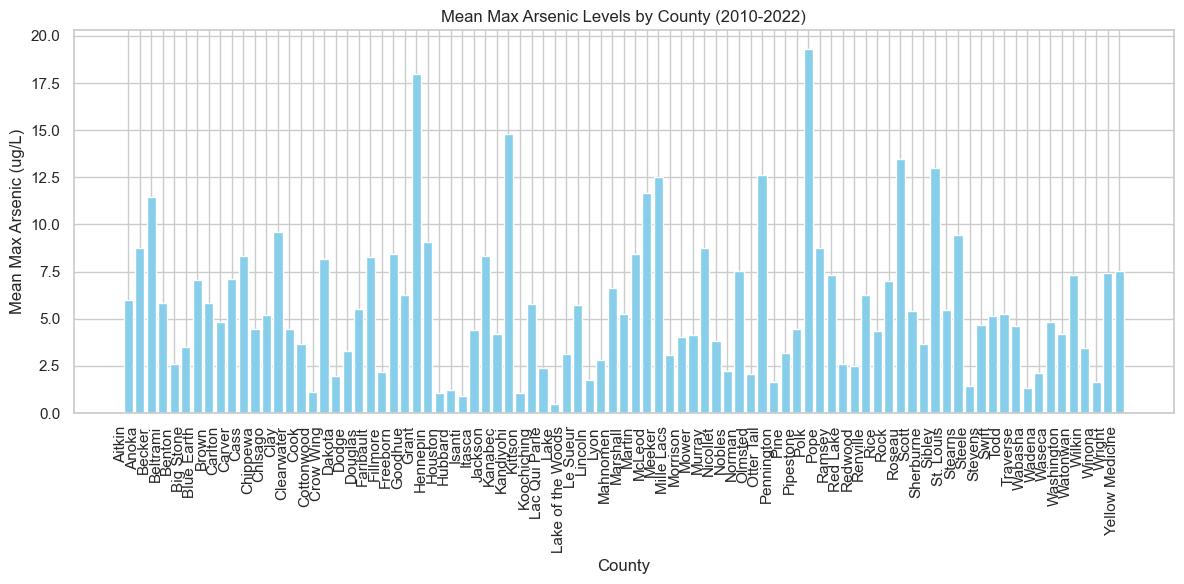

In [80]:
plt.figure(figsize=(12, 6))
plt.bar(df_avg_arsenic_by_county['countyServed'], df_avg_arsenic_by_county['max arsenic (ug/L)'], color='skyblue')
plt.xlabel('County')
plt.ylabel('Mean Max Arsenic (ug/L)')
plt.title('Mean Max Arsenic Levels by County (2010-2022)')
plt.xticks(rotation=90, ha='right')  
plt.tight_layout()
plt.show()

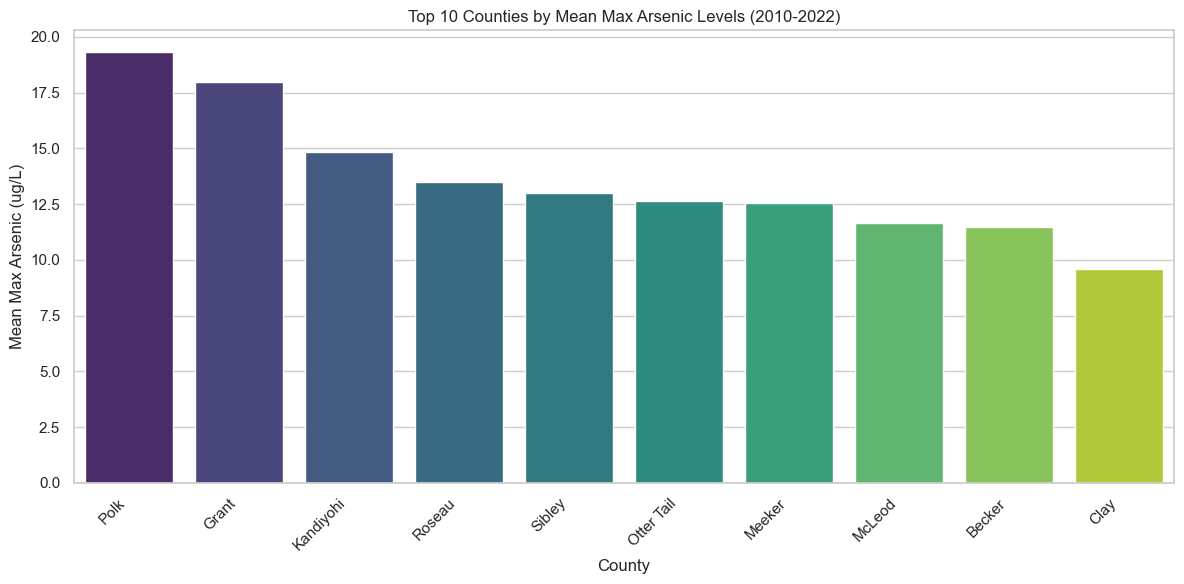

In [77]:
top_counties = df_avg_arsenic_by_county.nlargest(10, 'max arsenic (ug/L)')

plt.figure(figsize=(12, 6))
sns.barplot(x='countyServed', y='max arsenic (ug/L)', data=top_counties, palette='viridis')
plt.xlabel('County')
plt.ylabel('Mean Max Arsenic (ug/L)')
plt.title('Top 10 Counties by Mean Max Arsenic Levels (2010-2022)')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.savefig("output/top_10_Mean_arsenic")
plt.show()

In [57]:
merged_df = pd.merge(top_counties, poverty_df, left_on='countyServed', right_on='County', how='left')
merged_df.head()

,countyServed,max arsenic (ug/L),Unnamed: 0,Year,County,County Type,Sample Population,Poverty Population,Poverty Rate,Male Poverty Rate,Female Poverty Rate,Child Poverty Rate,Senior Poverty Rate
0,Polk,19.325,59,2010,Polk,Urban,29677.0,3868.0,13.03,6.29,6.74,3.82,2.46
1,Polk,19.325,146,2011,Polk,Urban,30255.0,3693.0,12.21,6.06,6.15,3.69,2.72
2,Polk,19.325,233,2012,Polk,Urban,30292.0,3705.0,12.23,6.34,5.89,3.70,2.60
3,Polk,19.325,320,2013,Polk,Urban,30347.0,3816.0,12.57,6.35,6.22,3.70,2.70
4,Polk,19.325,407,2014,Polk,Urban,30408.0,3957.0,13.01,6.32,6.69,3.60,2.91


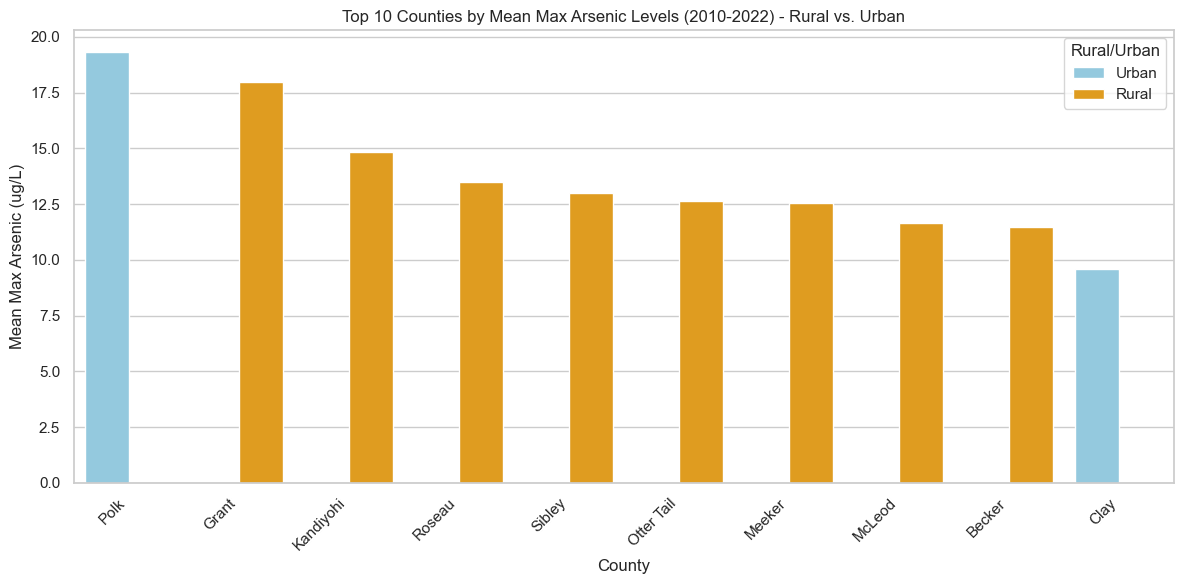

In [76]:
plt.figure(figsize=(12, 6))
sns.barplot(x='countyServed', y='max arsenic (ug/L)', data=merged_df, hue='County Type', palette={'Urban': 'skyblue', 'Rural': 'orange'})
plt.xlabel('County')
plt.ylabel('Mean Max Arsenic (ug/L)')
plt.title('Top 10 Counties by Mean Max Arsenic Levels (2010-2022) - Rural vs. Urban')
plt.xticks(rotation=45, ha='right') 
plt.legend(title='Rural/Urban')
plt.tight_layout()
plt.savefig("output/top_10_max_arsenic")
plt.show()

In [34]:
path_heart = Path("Resources/heart_attack_hospitalizations_by_county.csv")
heart_df = pd.read_csv(path_heart)
heart_df.head()

,fips,population,year,county,sex,age,ci,aci,rate,ageAdjust,count
0,27000,8346991,2008-2010,Minnesota,All,All Ages 35+ Combined ...,(30.5 - 31.2),(28.8 - 29.6),30.9,29.2,25751.0
1,27000,8584362,2011-2013,Minnesota,All,All Ages 35+ Combined ...,(28.8 - 29.6),(26.4 - 27.0),29.2,26.7,25070.0
2,27000,8762674,2013-2015,Minnesota,All,All Ages 35+ Combined ...,(28.6 - 29.3),(25.8 - 26.4),29.0,26.1,25404.0
3,27000,8936064,2015-2017,Minnesota,ALL,All Ages 35+ Combined ...,(0.0 - 0.0),(0.0 - 0.0),29.8,26.5,26626.0
4,27000,9031469,2016-2018,Minnesota,All,All Ages 35+ Combined ...,(29.5 - 30.2),(26.1 - 26.7),29.9,26.4,26995.0


In [35]:
# Convert 'year' column to string
heart_df['year'] = heart_df['year'].astype(str)

# Function to split years into individual years and average the heart attack the count
def distribute_count(row):
    try:
        start_year, end_year = map(int, row['year'].split('-'))
        year_range = end_year - start_year + 1
        count_per_year = row['count'] / year_range
        years = list(range(start_year, end_year + 1))
        counts = [count_per_year] * year_range
        return pd.DataFrame({'county': [row['county']] * year_range, 'year': years, 'count': counts})
    except (ValueError, AttributeError):
        return pd.DataFrame()

# Apply the function to each row and concatenate the results
heart_clean_df = pd.concat(heart_df.apply(distribute_count, axis=1).tolist(), ignore_index=True)

heart_clean_df

,county,year,count
0,Minnesota,2008,8583.666667
1,Minnesota,2009,8583.666667
2,Minnesota,2010,8583.666667
3,Minnesota,2011,8356.666667
4,Minnesota,2012,8356.666667
...,...,...,...
1843,Yellow Medicine,2018,18.213333
1844,Yellow Medicine,2019,18.213333
1845,Yellow Medicine,2018,20.283333
1846,Yellow Medicine,2019,20.283333


In [36]:
new_merged_df = pd.merge(top_counties, heart_clean_df, left_on='countyServed', right_on='county', how='left')
new_merged_df

,countyServed,max arsenic (ug/L),county,year,count
0,Polk,19.325000,Polk,2008,66.333333
1,Polk,19.325000,Polk,2009,66.333333
2,Polk,19.325000,Polk,2010,66.333333
3,Polk,19.325000,Polk,2011,51.333333
4,Polk,19.325000,Polk,2012,51.333333
...,...,...,...,...,...
205,Clay,9.613333,Clay,2018,115.353333
206,Clay,9.613333,Clay,2019,115.353333
207,Clay,9.613333,Clay,2018,124.636667
208,Clay,9.613333,Clay,2019,124.636667


In [37]:
all_data_df = pd.merge(new_merged_df, poverty_df, left_on='countyServed', right_on='County', how='left')
all_data_df.head()

,countyServed,max arsenic (ug/L),county,year,count,Unnamed: 0,Year,County,County Type,Sample Population,Poverty Population,Poverty Rate,Male Poverty Rate,Female Poverty Rate,Child Poverty Rate,Senior Poverty Rate
0,Polk,19.325,Polk,2008,66.333333,59,2010,Polk,Urban,29677.0,3868.0,13.03,6.29,6.74,3.82,2.46
1,Polk,19.325,Polk,2008,66.333333,146,2011,Polk,Urban,30255.0,3693.0,12.21,6.06,6.15,3.69,2.72
2,Polk,19.325,Polk,2008,66.333333,233,2012,Polk,Urban,30292.0,3705.0,12.23,6.34,5.89,3.70,2.60
3,Polk,19.325,Polk,2008,66.333333,320,2013,Polk,Urban,30347.0,3816.0,12.57,6.35,6.22,3.70,2.70
4,Polk,19.325,Polk,2008,66.333333,407,2014,Polk,Urban,30408.0,3957.0,13.01,6.32,6.69,3.60,2.91


In [38]:
# Create a new column 'combined_county' by combining the information from the three columns
all_data_df['combined_county'] = all_data_df['countyServed'].combine_first(all_data_df['county']).combine_first(all_data_df['County'])

# Drop the original columns if you no longer need them
combined_data_df = all_data_df.drop(['countyServed', 'county', 'County'], axis=1)

# Display the resulting DataFrame
combined_data_df


,max arsenic (ug/L),year,count,Unnamed: 0,Year,County Type,Sample Population,Poverty Population,Poverty Rate,Male Poverty Rate,Female Poverty Rate,Child Poverty Rate,Senior Poverty Rate,combined_county
0,19.325000,2008,66.333333,59,2010,Urban,29677.0,3868.0,13.03,6.29,6.74,3.82,2.46,Polk
1,19.325000,2008,66.333333,146,2011,Urban,30255.0,3693.0,12.21,6.06,6.15,3.69,2.72,Polk
2,19.325000,2008,66.333333,233,2012,Urban,30292.0,3705.0,12.23,6.34,5.89,3.70,2.60,Polk
3,19.325000,2008,66.333333,320,2013,Urban,30347.0,3816.0,12.57,6.35,6.22,3.70,2.70,Polk
4,19.325000,2008,66.333333,407,2014,Urban,30408.0,3957.0,13.01,6.32,6.69,3.60,2.91,Polk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2515,9.613333,2020,124.636667,622,2017,Urban,58044.0,7236.0,12.47,5.62,6.85,3.26,1.34,Clay
2516,9.613333,2020,124.636667,709,2018,Urban,58990.0,6828.0,11.57,5.29,6.29,3.04,1.25,Clay
2517,9.613333,2020,124.636667,796,2019,Urban,59791.0,7329.0,12.26,5.67,6.59,3.50,1.44,Clay
2518,9.613333,2020,124.636667,883,2020,Urban,60448.0,7835.0,12.96,5.68,7.28,3.92,1.80,Clay


In [59]:
path_poverty = Path("Resources/minnesota_poverty_data.csv")
poverty_df = pd.read_csv(path_poverty)
poverty_filter_df = poverty_df[['Year','Child Poverty %','Child Poverty','Population Poverty','Male Poverty %','Female Poverty %','Poverty %','Sample Population','County','OMB County Type']]
poverty_filter_df

,Year,Child Poverty %,Child Poverty,Population Poverty,Male Poverty %,Female Poverty %,Poverty %,Sample Population,County,OMB County Type
0,2010,4.110608,663.0,2185.0,6.125612,7.421415,13.547027,16129.0,Aitkin,Rural
1,2010,2.174054,7030.0,20730.0,2.781429,3.629403,6.410831,323359.0,Anoka,Urban
2,2010,3.918594,1240.0,3554.0,4.879282,6.351915,11.231197,31644.0,Becker,Rural
3,2010,7.266370,3055.0,8383.0,9.169184,10.769926,19.939110,42043.0,Beltrami,Rural
4,2010,3.752907,1404.0,4428.0,4.966454,6.869637,11.836091,37411.0,Benton,Urban
...,...,...,...,...,...,...,...,...,...,...
1039,2021,4.925709,547.0,1447.0,5.475011,7.555155,13.030167,11105.0,Watonwan,Rural
1040,2021,4.928806,315.0,865.0,4.709748,8.824910,13.534658,6391.0,Wilkin,Rural
1041,2021,1.721948,800.0,6245.0,6.676855,6.765105,13.441960,46459.0,Winona,Rural
1042,2021,1.409854,1953.0,6767.0,2.094929,2.790110,4.885039,138525.0,Wright,Urban


In [62]:
poverty_filter_df = poverty_filter_df.sort_values(by=['County', 'Year'])

# Separate numeric columns for mean calculation
numeric_columns = ['Child Poverty %', 'Child Poverty', 'Population Poverty', 'Male Poverty %', 'Female Poverty %', 'Poverty %', 'Sample Population']

# Group by 'County' and calculate the mean for numeric columns
average_poverty_df = poverty_filter_df.groupby('County')[numeric_columns].mean().reset_index()

# Include 'OMB County Type' in the result
average_poverty_df['OMB County Type'] = poverty_filter_df.groupby('County')['OMB County Type'].first().values

# Now, average_poverty_df contains the average percentages for each county
average_poverty_df


,County,Child Poverty %,Child Poverty,Population Poverty,Male Poverty %,Female Poverty %,Poverty %,Sample Population,OMB County Type
0,Aitkin,2.882852,454.083333,1948.416667,5.711574,6.678516,12.390089,15722.500000,Rural
1,Anoka,2.202507,7421.666667,22590.666667,3.010633,3.688391,6.699024,337842.833333,Urban
2,Becker,4.095819,1342.166667,3933.250000,5.187721,6.817553,12.005274,32782.166667,Rural
3,Beltrami,6.422762,2775.416667,8358.916667,9.045016,10.289400,19.334416,43260.083333,Rural
4,Benton,3.833415,1478.166667,4876.333333,5.297820,7.338276,12.636097,38682.250000,Urban
...,...,...,...,...,...,...,...,...,...
82,Watonwan,4.525465,494.666667,1286.416667,4.331026,7.437139,11.768165,10934.833333,Rural
83,Wilkin,2.463406,155.000000,585.750000,3.539449,5.757379,9.296828,6304.750000,Rural
84,Winona,2.186877,1031.416667,6863.833333,6.826741,7.728923,14.555664,47143.416667,Rural
85,Wright,1.745425,2226.166667,7013.166667,2.415297,3.062153,5.477450,128423.083333,Urban


In [63]:
data_df = pd.merge(df_avg_arsenic_by_county, average_poverty_df, left_on='countyServed', right_on='County', how='left')
data_df.head()

,countyServed,max arsenic (ug/L),County,Child Poverty %,Child Poverty,Population Poverty,Male Poverty %,Female Poverty %,Poverty %,Sample Population,OMB County Type
0,Aitkin,5.979167,Aitkin,2.882852,454.083333,1948.416667,5.711574,6.678516,12.390089,15722.500000,Rural
1,Anoka,8.749167,Anoka,2.202507,7421.666667,22590.666667,3.010633,3.688391,6.699024,337842.833333,Urban
2,Becker,11.467500,Becker,4.095819,1342.166667,3933.250000,5.187721,6.817553,12.005274,32782.166667,Rural
3,Beltrami,5.821667,Beltrami,6.422762,2775.416667,8358.916667,9.045016,10.289400,19.334416,43260.083333,Rural
4,Benton,2.582500,Benton,3.833415,1478.166667,4876.333333,5.297820,7.338276,12.636097,38682.250000,Urban


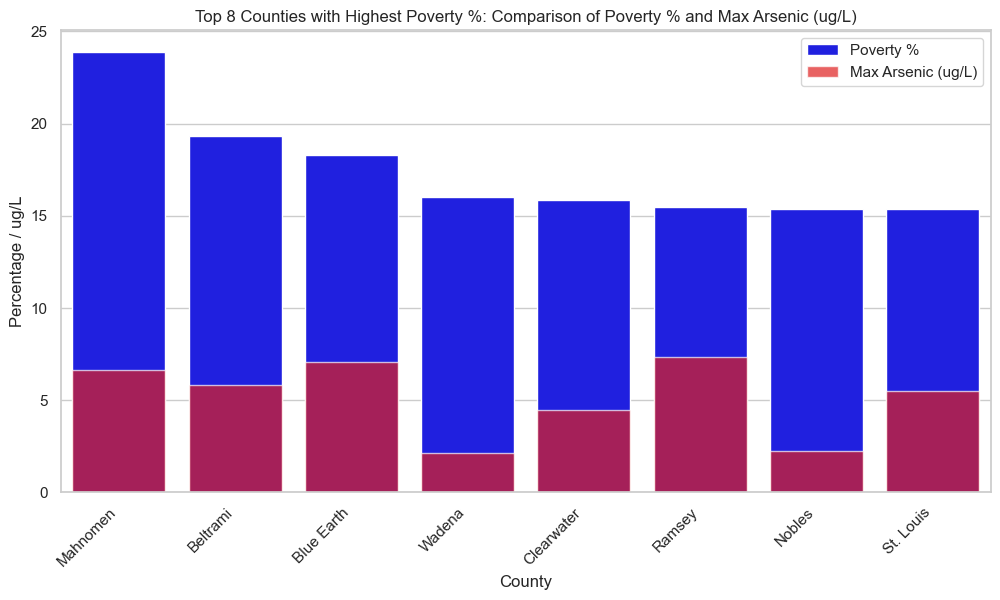

In [75]:
data_df['Poverty %'] = pd.to_numeric(data_df['Poverty %'], errors='coerce')
data_df['max arsenic (ug/L)'] = pd.to_numeric(data_df['max arsenic (ug/L)'], errors='coerce')

# Sort the DataFrame by 'Poverty %' in descending order
sorted_df = data_df.sort_values(by='Poverty %', ascending=False)

# Select the top 8 counties based on 'Poverty %'
top_8_data_df = sorted_df.head(8)

# Set the style for the plot (optional)
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x='County', y='Poverty %', data=top_8_data_df, color='blue', label='Poverty %')
bar_plot = sns.barplot(x='County', y='max arsenic (ug/L)', data=top_8_data_df, color='red', alpha=0.7, label='Max Arsenic (ug/L)')

# Add labels and title
plt.xlabel('County')
plt.ylabel('Percentage / ug/L')
plt.title('Top 8 Counties with Highest Poverty %: Comparison of Poverty % and Max Arsenic (ug/L)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')
plt.savefig("output/top_8_arsenic")
# Show the plot
plt.show()

